In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

styles = ['default', 'classic'] + sorted(
        style for style in plt.style.available
        if style != 'classic' and not style.startswith('_'))
print(styles)

# plt.style.use('ggplot')
# plt.style.use('seaborn-v0_8-deep')
plt.style.use('tableau-colorblind10')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large,
          'axes.axisbelow': True
         }
plt.rcParams.update(params)

colors = sns.color_palette("deep")
markers = [c for c in "o*ds^v<>X|1"]

['default', 'classic', 'Solarize_Light2', 'bmh', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
Lq       = [197,  150,  100,  50,   20,   10][::-1]
Lk       = [197,  150,  100,  50,   20,   10][::-1]
NN_Lk50 =  [None, None, 56.8, 64.0, None, None][::-1]
NN_Lk100 = [None, None, 56.8, 64.0, None, None][::-1]
NN_Lk197 = [58.8, 63.1, 66.6, 66.3, 56.5, 21.5][::-1]

## Progression

In [11]:
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 3, figsize=(12, 3.6), dpi=300, sharey=True)


labels = ['Naive\nLatent MIM', '+Momentum\nTargets', '+Patch \nContrastive Loss', '+Lower\nPatch Redundancy',  '+Improved\nDecoder Design', '+Patch\nSimilarity Reg']
nn_acc = [ 1.0, 18.8, 30.0, 57.4, 59.9, 63.3]
lp_acc = [13.1, 39.3, 53.4, 72.0, 74.0, 77.3]
ft_acc = [54.7, 79.7, 86.0, 89.0, 88.7, 89.9]

mae = [30, 70.4, 88.3]
mae_color = '#DD4040'
for ax, acc, xlabel in zip(axes, mae, ['NN Acc [%]', 'LP Acc [%]', 'FT Acc [%]']):
    label_offset = 2 if xlabel == 'FT Acc [%]' else 4
    ax.plot([acc, acc], [len(labels)+1, 0], '--', lw=1.5, color=mae_color)
    ann = ax.annotate(f'MAE\n({acc}%)', (acc+label_offset, len(labels)), fontsize=12, va='center', ha='left', color=mae_color)
    ann.set_bbox(dict(facecolor='white', alpha=0.8, linewidth=0))

for ax, xlabel, acc in zip(axes, 
                           ['IN1K NN Acc [%]', 'IN1K LP Acc [%]', 'IN1K FT Acc [%]'],
                           [nn_acc, lp_acc, ft_acc]):
    
    min_acc = 0 if xlabel != 'IN1K FT Acc [%]' else 50
    label_offset = 3 if xlabel == 'IN1K FT Acc [%]' else 6
    ax.plot(acc, range(len(labels), 0, -1), 'o--')
    ax.set(
        ylim=(0.5, len(labels)+0.5),
        yticks=range(len(labels), 0, -1),
        yticklabels=labels,
        xlim=(min_acc, 100),
        xticks=range(min_acc, 101, (100-min_acc)//5),
        xlabel=xlabel,
    )
    ax.tick_params(left=False, bottom=False)
    ax.yaxis.grid(color='gray', alpha=0.3, linestyle='dashed')
    ax.xaxis.grid(color='gray', alpha=0.3, linestyle='dashed')
    for i in range(len(labels), 1, -1):
        diff = acc[i-1] - acc[i-2]
        text = f'{acc[i-1]}\n('
        text += f'+{diff:.1f})' if diff > 0 else f'{diff:.1f})'
        ann = ax.annotate(text, (acc[i-1]+label_offset, len(labels)-i+1), fontsize=12, va='center', ha='left', annotation_clip=False)
        ann.set_bbox(dict(facecolor='white', alpha=0.8, linewidth=0))
plt.tight_layout()
plt.savefig("./study-results.pdf")


# Examples
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

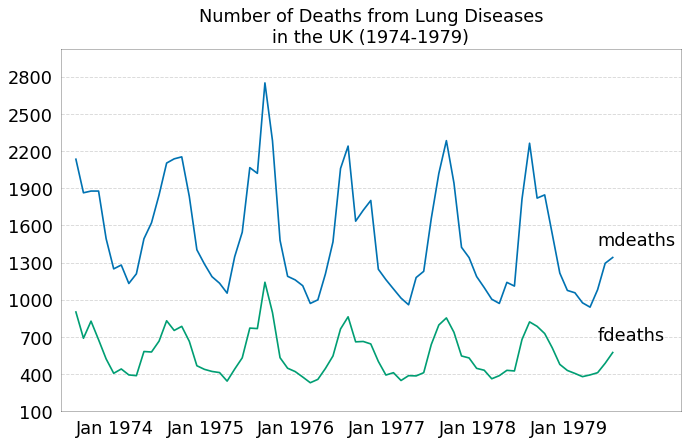

In [141]:
# Import Data
df = pd.read_csv('https://github.com/selva86/datasets/raw/master/mortality.csv')

# Define the upper limit, lower limit, interval of Y axis and colors
y_LL = 100
y_UL = int(df.iloc[:, 1:].max().max()*1.1)
y_interval = 300

# Draw Plot and Annotate
fig, ax = plt.subplots(1,1,figsize=(10, 6), dpi= 80)    

columns = df.columns[1:]  
for i, column in enumerate(columns):    
    plt.plot(df.date.values, df[column].values, lw=1.5)    
    plt.text(df.shape[0]-3, df[column].values[-1]+100, column, fontsize=med)

# Draw Tick lines  
ax.yaxis.grid(color='gray', alpha=0.3, linestyle='dashed')

# Decorations    
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)

# Lighten borders
for k in ["top", "bottom", "right", "left"]:
    plt.gca().spines[k].set_alpha(.3)

plt.title(f'Number of Deaths from Lung Diseases\nin the UK (1974-1979)')
plt.yticks(range(y_LL, y_UL, y_interval), [str(y) for y in range(y_LL, y_UL, y_interval)])
plt.xticks(range(0, df.shape[0], 12), df.date.values[::12], horizontalalignment='left')
plt.ylim(y_LL, y_UL)    
plt.xlim(-2, 80)    
plt.show()


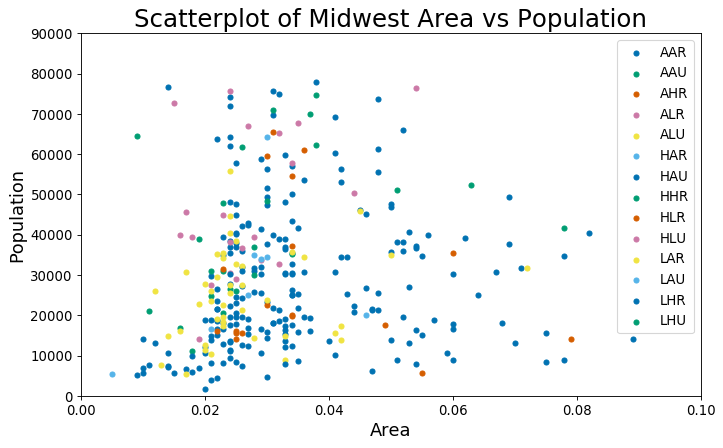

In [142]:
# Import dataset 
midwest = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv")

# Prepare Data 
# Create as many colors as there are unique midwest['category']
categories = np.unique(midwest['category'])
# colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(10, 6), dpi= 80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', 
                data=midwest.loc[midwest.category==category, :], 
                s=20, label=str(category))

# Decorations
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Midwest Area vs Population", fontsize=22)
plt.legend(fontsize=12)    
plt.show()   

/Users/morgado/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


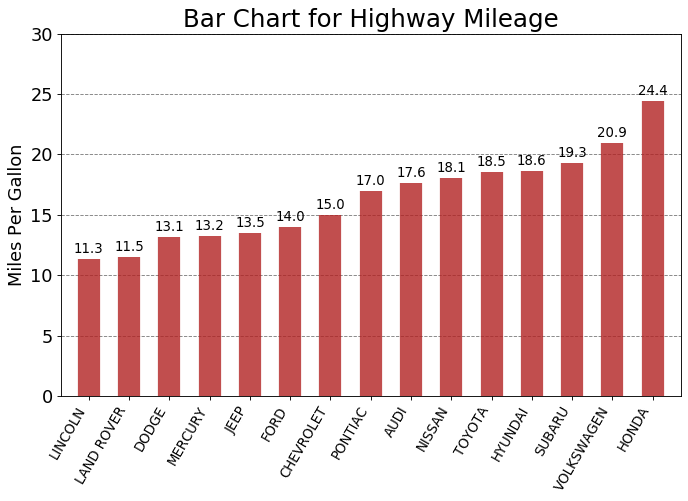

In [143]:
# Prepare Data
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(10,6), facecolor='white', dpi=80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.8, linewidth=20)
ax.yaxis.grid(color='gray', linestyle='dashed')


# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center', fontsize=small)


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontsize=large)
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=small)

# Add patches to color the X axis labels
# p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
# p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
# fig.add_artist(p1)
# fig.add_artist(p2)
plt.show()